In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

In [32]:
raw_data = pd.read_csv('datasets/samsung200129_220328.csv')
print(raw_data.head())
raw_data.info()

         Date     Open     High      Low    Close     Adj Close    Volume
0  2020-01-29  59100.0  59700.0  58800.0  59100.0  55485.578125  16446102
1  2020-01-30  58800.0  58800.0  56800.0  57200.0  53701.785156  20821939
2  2020-01-31  57800.0  58400.0  56400.0  56400.0  52950.710938  19749457
3  2020-02-03  55500.0  57400.0  55200.0  57200.0  53701.785156  23995260
4  2020-02-04  57100.0  59000.0  56800.0  58900.0  55297.820313  21800192
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       534 non-null    object 
 1   Open       534 non-null    float64
 2   High       534 non-null    float64
 3   Low        534 non-null    float64
 4   Close      534 non-null    float64
 5   Adj Close  534 non-null    float64
 6   Volume     534 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 29.3+ KB


In [33]:
raw_data['Date'] = pd.to_datetime(raw_data['Date'])
raw_data.set_index('Date', inplace=True)
print(raw_data.head())

               Open     High      Low    Close     Adj Close    Volume
Date                                                                  
2020-01-29  59100.0  59700.0  58800.0  59100.0  55485.578125  16446102
2020-01-30  58800.0  58800.0  56800.0  57200.0  53701.785156  20821939
2020-01-31  57800.0  58400.0  56400.0  56400.0  52950.710938  19749457
2020-02-03  55500.0  57400.0  55200.0  57200.0  53701.785156  23995260
2020-02-04  57100.0  59000.0  56800.0  58900.0  55297.820313  21800192


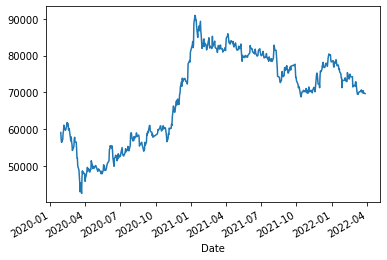

In [34]:
raw_data['Close'].plot()
plt.show()

In [35]:
data_test = raw_data.sort_values('Close')
print(data_test.head())
print(data_test.tail())

               Open     High      Low    Close     Adj Close    Volume
Date                                                                  
2020-03-23  42600.0  43550.0  42400.0  42500.0  39900.800781  41701626
2020-03-19  46400.0  46650.0  42300.0  42950.0  40323.285156  56925513
2020-03-20  44150.0  45500.0  43550.0  45400.0  42623.441406  49730008
2020-03-18  47750.0  48350.0  45600.0  45600.0  42811.210938  40152623
2020-04-01  47450.0  47900.0  45800.0  45800.0  43316.453125  27259532
               Open     High      Low    Close     Adj Close    Volume
Date                                                                  
2021-01-25  87000.0  89900.0  86300.0  89400.0  87796.437500  27258534
2021-01-13  89800.0  91200.0  89100.0  89700.0  88091.054688  36068848
2021-01-14  88700.0  90000.0  88700.0  89700.0  88091.054688  26393970
2021-01-12  90300.0  91400.0  87800.0  90600.0  88974.914063  48682416
2021-01-11  90000.0  96800.0  89500.0  91000.0  89367.750000  90306177


In [36]:
data_close = raw_data[['Close']]
print(data_close.head())

              Close
Date               
2020-01-29  59100.0
2020-01-30  57200.0
2020-01-31  56400.0
2020-02-03  57200.0
2020-02-04  58900.0


In [37]:
minmaxscaler = MinMaxScaler()
scaled_data = minmaxscaler.fit_transform(data_close)  #np ndarray
print(scaled_data[:5])
print(scaled_data.shape)

[[0.34226804]
 [0.30309278]
 [0.28659794]
 [0.30309278]
 [0.33814433]]
(534, 1)


In [38]:
#sequence data만들기
sequence_X = []
sequence_Y = []  #

for i in range(len(scaled_data)-30):
  x = scaled_data[i:i+30] #30개씩
  y = scaled_data[i+30] #Close는 index가 3
  sequence_X.append(x)
  sequence_Y.append(y)
print(sequence_X[:5])
print("="*50)
print(sequence_Y[:5])

#X에는 0-30 , 1-31, 2-32, Y에는 31일, 32일치 예측 

[array([[0.34226804],
       [0.30309278],
       [0.28659794],
       [0.30309278],
       [0.33814433],
       [0.35051546],
       [0.38350515],
       [0.36907216],
       [0.35463918],
       [0.35876289],
       [0.37113402],
       [0.37525773],
       [0.39793814],
       [0.39175258],
       [0.35670103],
       [0.36494845],
       [0.36082474],
       [0.3443299 ],
       [0.29484536],
       [0.31752577],
       [0.28865979],
       [0.27628866],
       [0.24123711],
       [0.25773196],
       [0.26597938],
       [0.30721649],
       [0.31546392],
       [0.28865979],
       [0.28865979],
       [0.24948454]]), array([[0.30309278],
       [0.28659794],
       [0.30309278],
       [0.33814433],
       [0.35051546],
       [0.38350515],
       [0.36907216],
       [0.35463918],
       [0.35876289],
       [0.37113402],
       [0.37525773],
       [0.39793814],
       [0.39175258],
       [0.35670103],
       [0.36494845],
       [0.36082474],
       [0.3443299 ],
       [0.

In [39]:
sequence_X = np.array(sequence_X)  #np.array로 바꾸는 이유는?
sequence_Y = np.array(sequence_Y)
print(sequence_X[0])
print(sequence_Y[0])
print(sequence_X.shape)
print(sequence_Y.shape)

[[0.34226804]
 [0.30309278]
 [0.28659794]
 [0.30309278]
 [0.33814433]
 [0.35051546]
 [0.38350515]
 [0.36907216]
 [0.35463918]
 [0.35876289]
 [0.37113402]
 [0.37525773]
 [0.39793814]
 [0.39175258]
 [0.35670103]
 [0.36494845]
 [0.36082474]
 [0.3443299 ]
 [0.29484536]
 [0.31752577]
 [0.28865979]
 [0.27628866]
 [0.24123711]
 [0.25773196]
 [0.26597938]
 [0.30721649]
 [0.31546392]
 [0.28865979]
 [0.28865979]
 [0.24948454]]
[0.19793814]
(504, 30, 1)
(504, 1)


In [40]:
#train과 test 로 데이터 나누기
X_train, X_test, Y_train, Y_test = train_test_split(
  sequence_X, sequence_Y, test_size=0.2)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(403, 30, 1) (403, 1)
(101, 30, 1) (101, 1)


In [41]:
model = Sequential()
#LSTM은 activation으로 tanh을 씀, -값을 가짐
model.add(LSTM(50, input_shape=(30,1),
               activation='tanh'))  
model.add(Flatten())
model.add(Dense(1)) #값을 예측할 때는 출력이 1개, activation을 쓰지 않음
model.compile(loss='mse', optimizer='adam') #accuracy는 분류정확도, 값을 예측할때는 loss가 중요, mse가 떨어지도록 학습
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 50)                10400     
                                                                 
 flatten_1 (Flatten)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [ ]:
fit_hist = model.fit(X_train, Y_train, epochs=100,
                     validation_data=(X_test, Y_test), shuffle=False)
#validation_split은 랜덤하게 뽑아서 에폭마다 학습이 됨/
#validation_data는  검증만함, 매번 새로 뽑지 않고, loss값만 찾아서 주고, 모든 데이터로 학습,,? 앞에거부터 순서대로 학습해야해서 shuffle=Fasle 디폴트는 랜덤


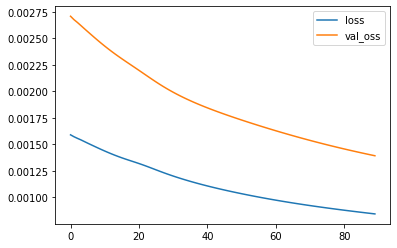

In [45]:
plt.plot(fit_hist.history['loss'][10:], label='loss')
plt.plot(fit_hist.history['val_loss'][10:], label='val_loss')
plt.legend()
plt.show()

In [46]:
model.save('./stock_close_predict.h5')

In [47]:
pred = model.predict(X_test)


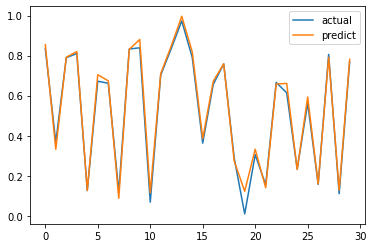

In [50]:
plt.plot(Y_test[:30], label='actual')
plt.plot(pred[:30], label='predict')
plt.legend()
plt.show()



In [51]:
last_data_30 = scaled_data[-30:].reshape(1, 30, 1)
today_close = model.predict(last_data_30)
print(today_close)

[[0.57849145]]


In [52]:
today_close_value = minmaxscaler.inverse_transform(today_close)
print(today_close_value)

[[70556.836]]


In [56]:
today_actual = [70200]
today_actual = pd.DataFrame(today_actual)

scaled_today_actual = minmaxscaler.transform(today_actual)
#fit_transform하면 이미 가지고있는 min,max가 바뀌게 됨, 이미 있는 값으로 transform해줘야함()
print(scaled_today_actual)

[[0.57113402]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


In [58]:
last_data_29 = scaled_data[-29:]
last_30_data = np.append(last_data_29, scaled_today_actual)
last_30_data = last_30_data.reshape(1, 30, 1)
print(last_30_data.shape)

(1, 30, 1)


In [61]:
tomorrow_close = model.predict(last_30_data)
tomorrow_predicted_value = minmaxscaler.inverse_transform(tomorrow_close)
print('%d 원'%tomorrow_predicted_value[0][0])

[[70626.28]]
